In [25]:
import numpy as np
class Perceptron:
    """Персептронный классификатор.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    errors_ : list
      Количество неправильных классификаций (обновлений) в каждой эпохе.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Соответствие тренировочным данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [26]:
V1 = np.array([1, 2, 3])
V2 = 0.5 * V1
np.arccos(V1.dot(V2) / (np.linalg.norm(V1) * np.linalg.norm(V2)))

0.0

In [27]:
import pandas as pd
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


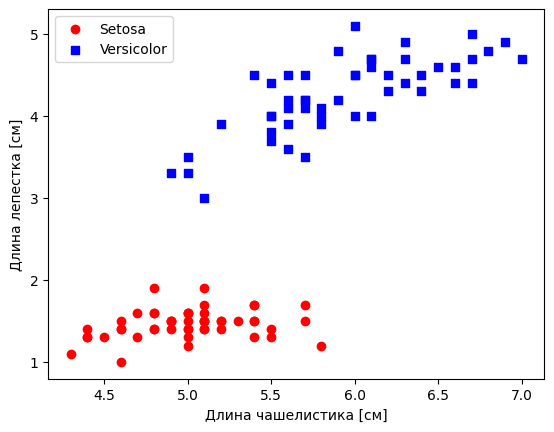

In [28]:
import matplotlib.pyplot as plt

# выбираем setosa и versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# извлекаем длину чашелистика и длину лепестка
X = df.iloc[0:100, [0, 2]].values

# отбражаем данные
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

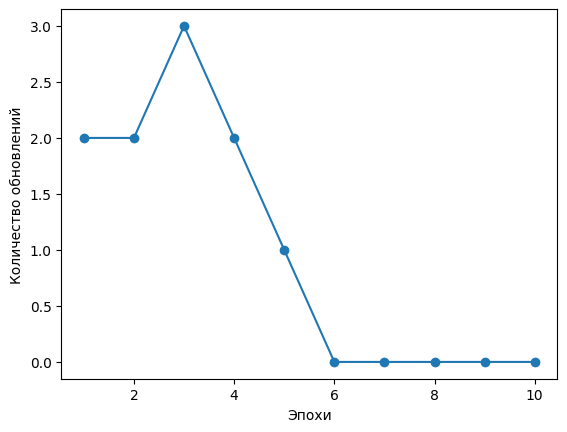

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Эпохи")
plt.ylabel('Количество обновлений')
plt.show()

In [30]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Настройка генератора меток и цветовой карты
    markers = ('o','s', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # постоение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # постоение образцов класса
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')

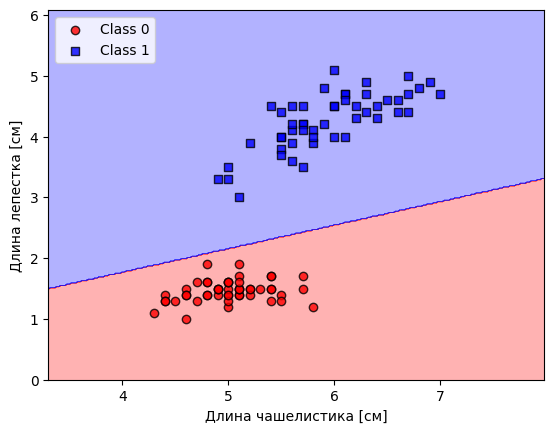

In [31]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [32]:
class AdalineGD:
    """Классификатор на адаптивных линейных нейронах.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, X):
        """Вычисление линейной активации"""
        return X
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

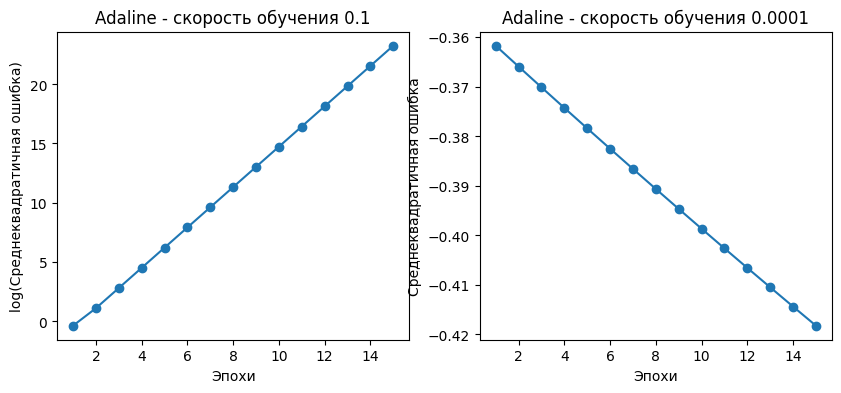

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Среднеквадратичная ошибка)')
ax[0].set_title('Adaline - скорость обучения 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('Среднеквадратичная ошибка')
ax[1].set_title('Adaline - скорость обучения 0.0001')
plt.show()

In [34]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

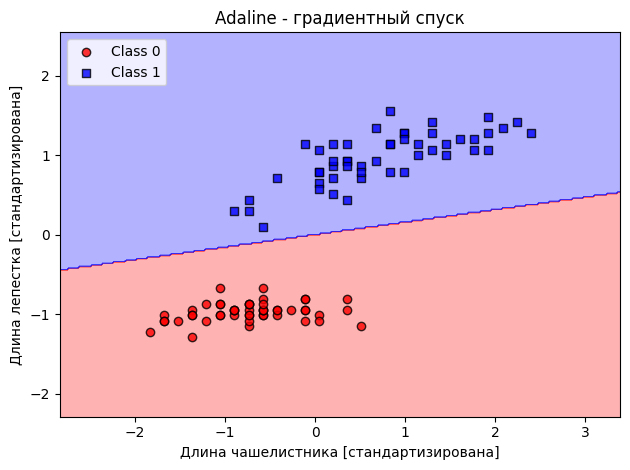

In [35]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - градиентный спуск')
plt.xlabel('Длина чашелистника [стандартизирована]')
plt.ylabel('Длина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


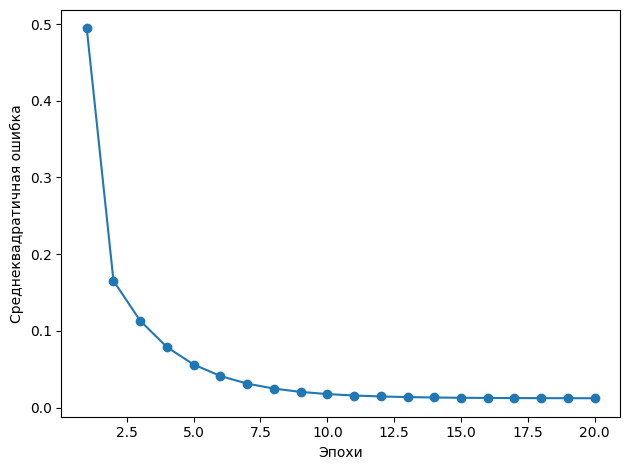

In [36]:
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.tight_layout()
plt.show()

In [37]:
class AdalineSGD:
    """Классификатор на адаптивных линейных нейронах.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    shuffle : bool (default: True)
      Перемешывание обучающих данных каждую эпоху, если задано True,
      для предотвращения возникноения циклов.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : object
        """
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        """Подгонка к обучающим данным без повторной инициализации весов"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Перемешивание обучающих данных"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Инициализация весов небольшими обучающими данными"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Применение правила Adaline для обновления весов"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Вычисление фактического ввода"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, X):
        """Вычисление линейной активации"""
        return X
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

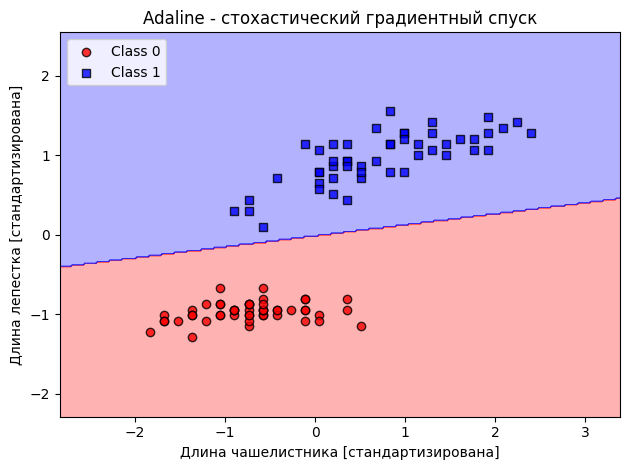

In [38]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - стохастический градиентный спуск')
plt.xlabel('Длина чашелистника [стандартизирована]')
plt.ylabel('Длина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

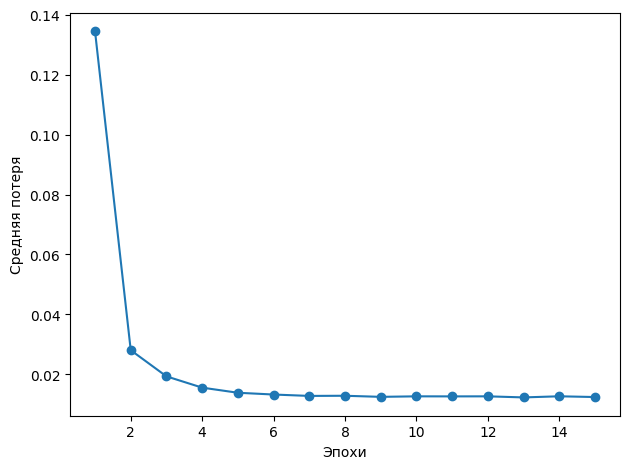

In [39]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Средняя потеря')
plt.tight_layout()
plt.show()

# Классификаторы

In [40]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Метки класса: ', np.unique(y))

Метки класса:  [0 1 2]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)


In [42]:
print('Количество меток в у: ', np.bincount(y))
print('Количество меток в у_train: ', np.bincount(y_train))
print('Количество меток в у_test: ', np.bincount(y_test))

Количество меток в у:  [50 50 50]
Количество меток в у_train:  [35 35 35]
Количество меток в у_test:  [15 15 15]


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [45]:
y_pred = ppn.predict(X_test_std)
print('Ошибочно классифицированы: %d' % (y_test != y_pred).sum())

Ошибочно классифицированы: 1


In [46]:
from sklearn.metrics import accuracy_score
print('Точность: %.3f' % accuracy_score(y_test, y_pred))

Точность: 0.978


In [47]:
print('Точность: %.3f' % ppn.score(X_test_std, y_test))

Точность: 0.978


In [48]:
from matplotlib.colors import ListedColormap
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Настройка генератора меток и цветовой карты
    markers = ('o','s', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # постоение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # постоение образцов класса
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')
    # выделяем тестовые образцы
    if test_idx:
        # отобразить все образцы
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none',
                    edgecolors='black', alpha=1.0, linewidths=1,
                    marker='o', s=100, label='Test set')

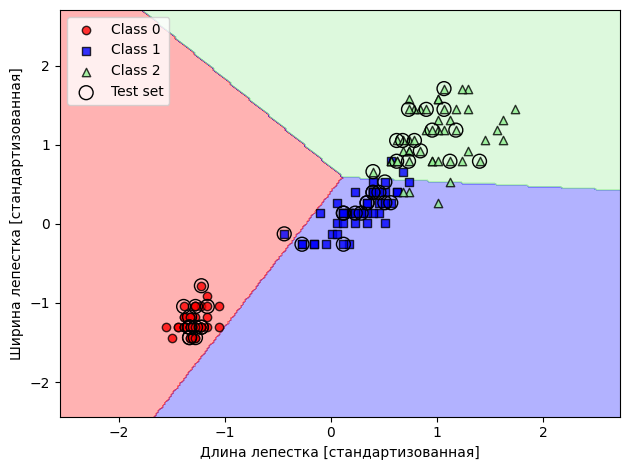

In [49]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизованная]')
plt.ylabel('Ширина лепестка [стандартизованная]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

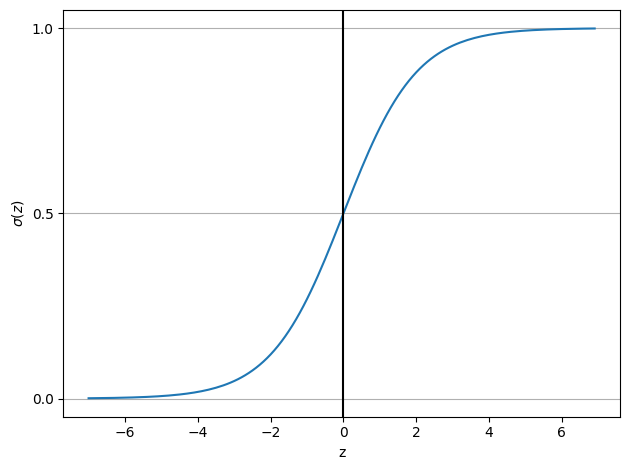

In [50]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# деление оси у на линии сетки
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

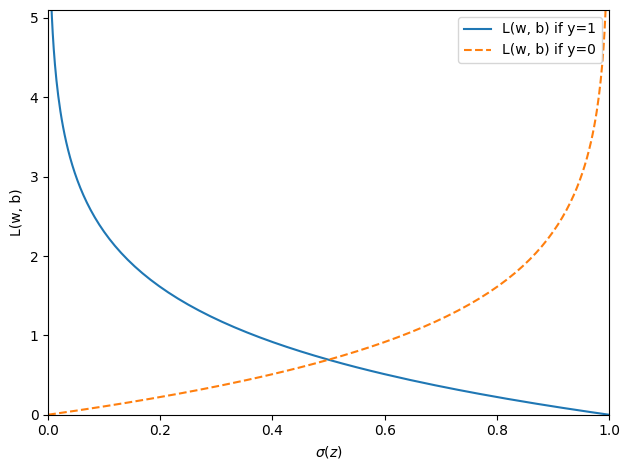

In [51]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [52]:
class LogisticRegressionGD:
    """Классификатор по методу логистической регрессии на основе градиентного спуска.
    
    Параметры
    ----------
    eta : float
      Скорость обучения (между 0.0 и 1.0)
    n_iter : int
      Кол-во проходов по обучающему набору.
    random_state : int
      Опорное значение генератора случайных чисел для инициализация весов.
    
    Атрибуты
    --------
    w_ : 1d-array
      Веса после подгонки.
    b_ : Scalar
      Смещение после подгонки.
    losses_ : list
      Значение спеднеквадратичной функции потерь после каждой эпохи.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Подгонка к обучающим данным..
        
        Параметры
        ---------
        X : (array-like), shape = [n_expample, n_features]
          Обучающий вектор, где n_examples - это количество образцов,
          а n_features - количество признаков.
        y : array-like, shape = [n_examples]
          Целевые значения.
          
        Возвращение значения
        --------------------
        self : Экземпляр LogisticRegressionGD
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Вычисление фактического входа"""
        return np.dot(X, self.w_) + self.b_ 
    
    def activation(self, z):
        """Вычисление линейной активации"""
        return 1. / (1. + np.exp(-np.clip(z, -250,250)))
    
    def predict(self, X):
        """Возвращает метки класса после шага"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

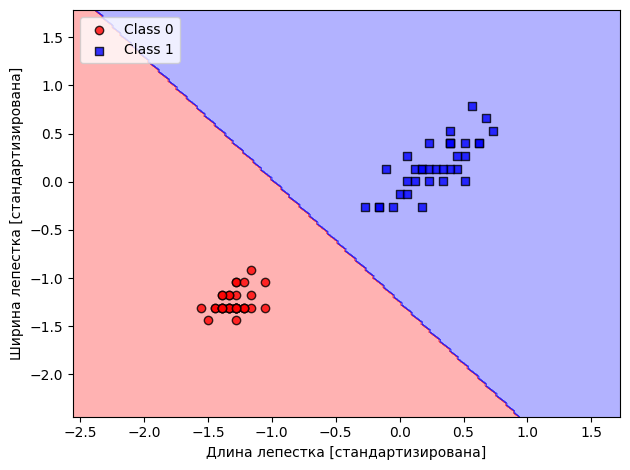

In [53]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

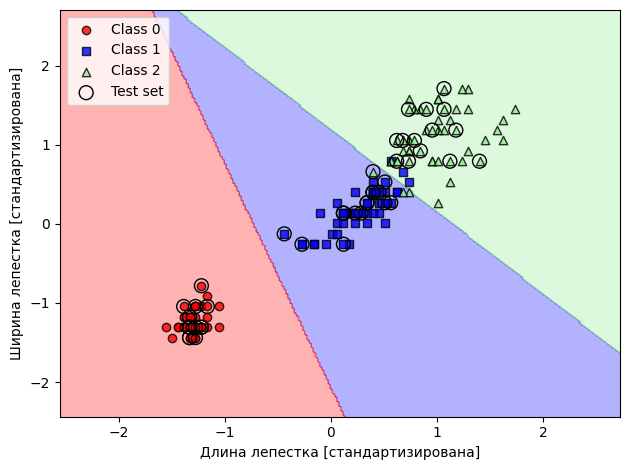

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [63]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [64]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [68]:
lr.predict((X_test_std[0, :]).reshape(1, -1))

array([2])

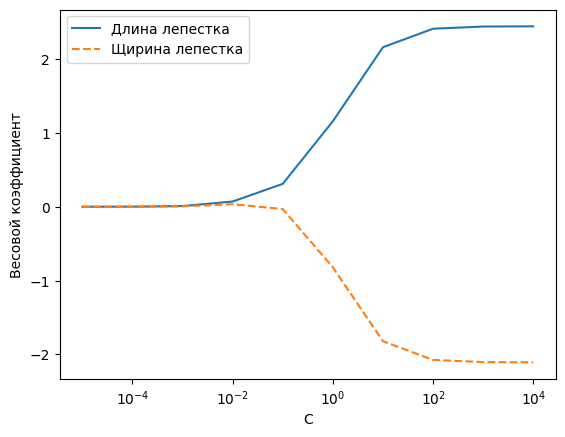

In [69]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Длина лепестка')
plt.plot(params, weights[:, 1], linestyle='--', label='Щирина лепестка')
plt.ylabel('Весовой коэффициент')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

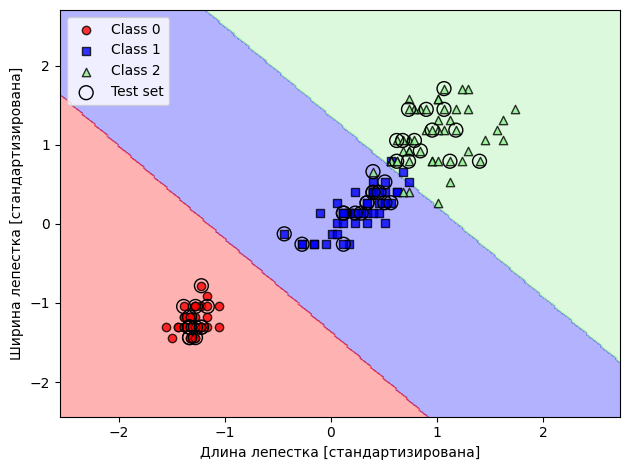

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

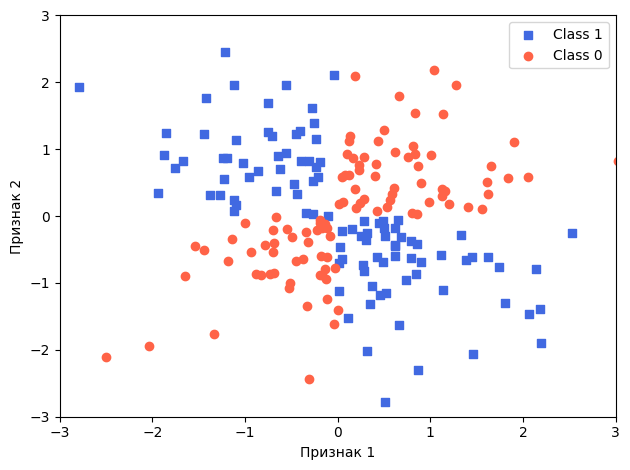

In [72]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

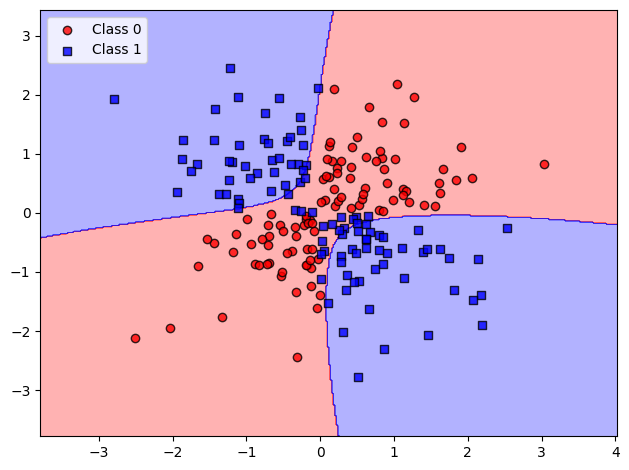

In [73]:
svm = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X=X_xor, y=y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

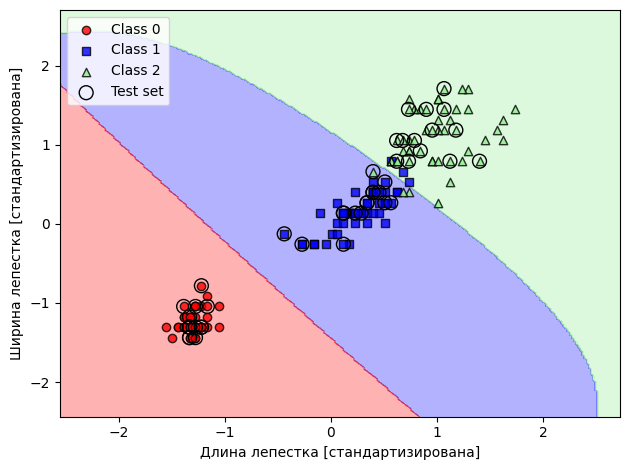

In [74]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

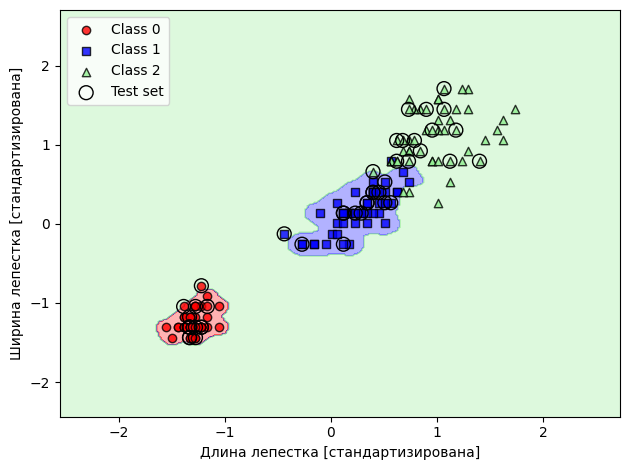

In [75]:
svm = SVC(kernel='rbf', C=1.0, gamma=100, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

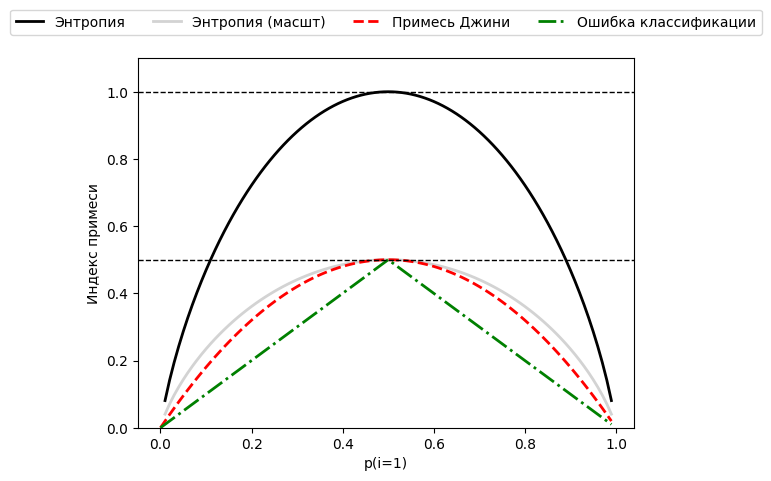

In [81]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Энтропия', 'Энтропия (масшт)','Примесь Джини','Ошибка классификации'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.ylabel('Индекс примеси')
plt.xlabel('p(i=1)')
plt.show()

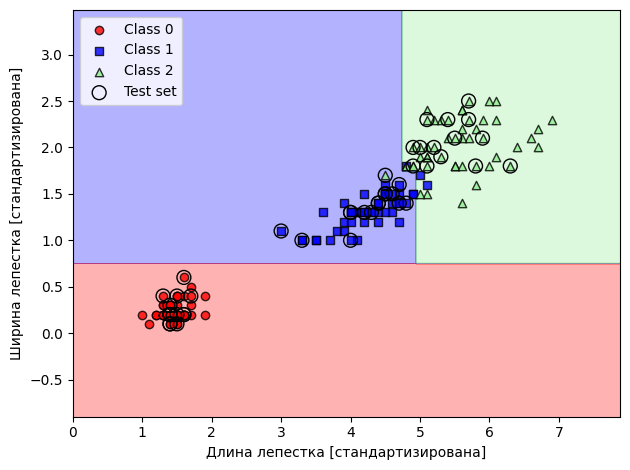

In [90]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

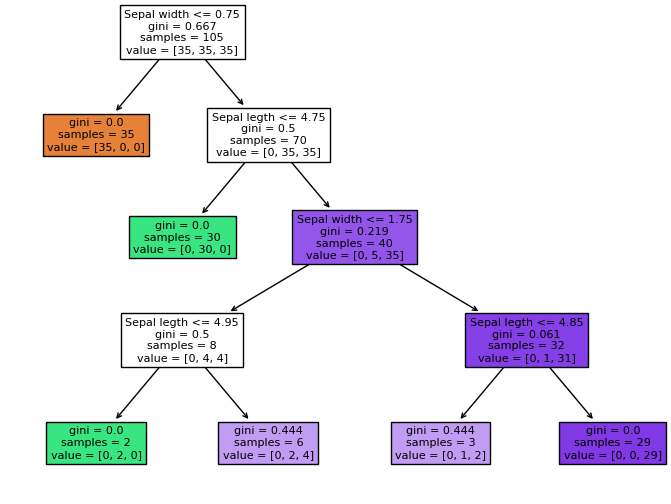

In [91]:
from sklearn import tree
features_names = ['Sepal legth', 'Sepal width', 'Petal  legth', 'Petal width']
tree.plot_tree(tree_model, feature_names=features_names, filled=True)
plt.show()

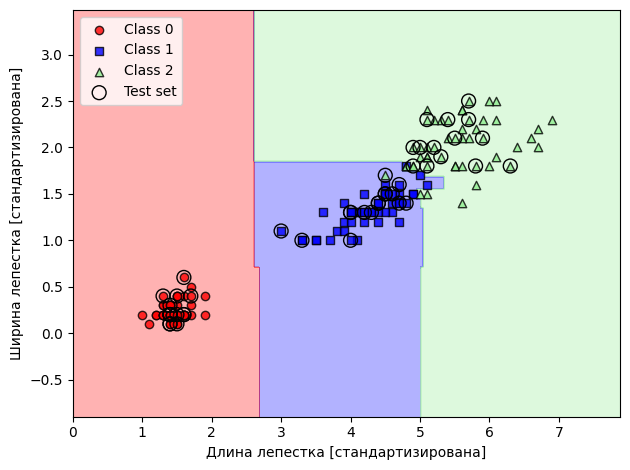

In [92]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X=X_combined, y=y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

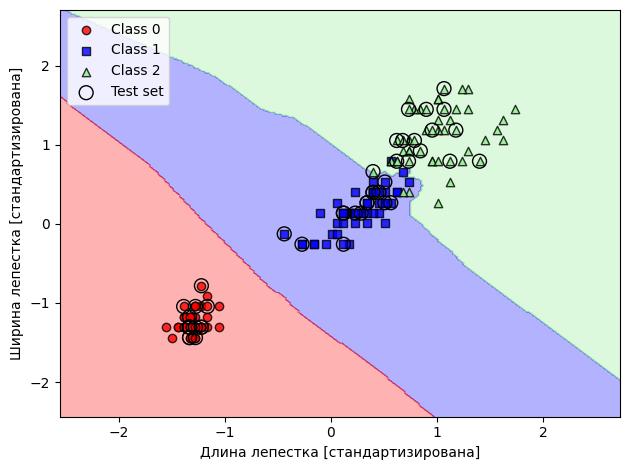

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd
from io import StringIO

In [97]:
csv_data = """A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0"""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [98]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [99]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [100]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [101]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [102]:
# удальет только строки? для которых все столбцы nan
# возвращает массив, в котором нет строк, содержащих только значение nan
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [103]:
# удаляет строки, в которых не менее 4 реальных значения
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [104]:
# удаляет только строки, в которыхNan содержится
# только в заданных столбцах
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [106]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [107]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [108]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [109]:
size_mapping = {'XL' : 3, 'L' : 2, 'M' : 1}


In [110]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [112]:
inv_size_mapping = {v : k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [113]:
class_mapping = {label : idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [114]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [115]:
inv_class_mapping = {v : k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [116]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [117]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [118]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [119]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [120]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size','price']].values
c_transf = ColumnTransformer([
           ('onehot', OneHotEncoder(), [0]),
           ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [122]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)


,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [123]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
           ('onehot', color_ohe, [0]),
           ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [124]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [126]:
df['x > M'] = df['size'].apply(lambda x : 1 if x in ('L', 'XL') else 0)
df['x > L'] = df['size'].apply(lambda x : 1 if x =='XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [127]:
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                   'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of dilutes wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [128]:
df_wine.head()

,Class label,Alohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of dilutes wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [129]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [130]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [131]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('стандартизованы: ', (ex - ex.mean()) / ex.std())

стандартизованы:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [132]:
print('нормализованы: ', (ex - ex.min()) / (ex.max() - ex.min()))

нормализованы:  [0.  0.2 0.4 0.6 0.8 1. ]


In [133]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', C=1.0)
lr.fit(X_train_std, y_train)
print('Точность при обучении: ', lr.score(X_train_std, y_train))
print('Точность при тестировании: ', lr.score(X_test_std, y_test))

Точность при обучении:  1.0
Точность при тестировании:  1.0


In [135]:
lr.intercept_

array([-1.26357273, -1.2159133 , -2.37030926])

In [136]:
lr.coef_

array([[ 1.24548259,  0.18074234,  0.74644317, -1.16439284,  0.        ,
         0.        ,  1.16089728,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55702223,  2.50930227],
       [-1.53723715, -0.38717111, -0.99498309,  0.36462824, -0.05964223,
         0.        ,  0.66822182,  0.        ,  0.        , -1.93401758,
         1.23425596,  0.        , -2.23234257],
       [ 0.13575227,  0.16830543,  0.3572118 ,  0.        ,  0.        ,
         0.        , -2.43827593,  0.        ,  0.        ,  1.56379034,
        -0.81905107, -0.49229508,  0.        ]])

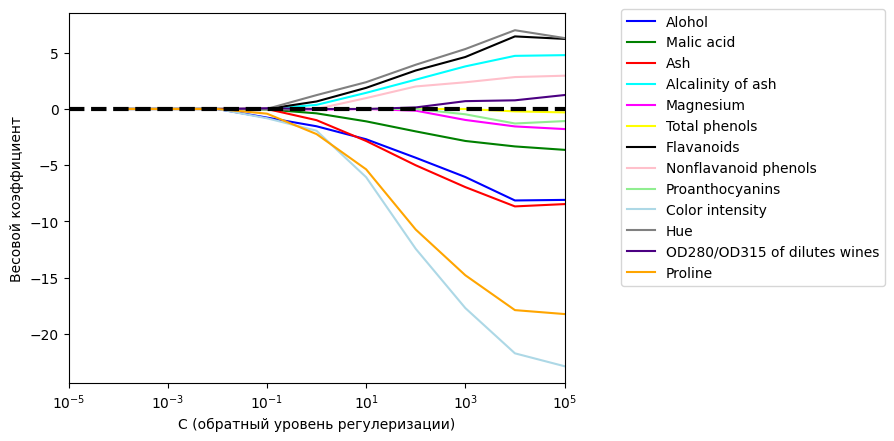

In [137]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow',
          'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], 
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("Весовой коэффициент")
plt.xlabel('C (обратный уровень регулеризации)')
plt.xscale('log')
plt.legend(loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [143]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25,  random_state=1) -> None:
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size =test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score                

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

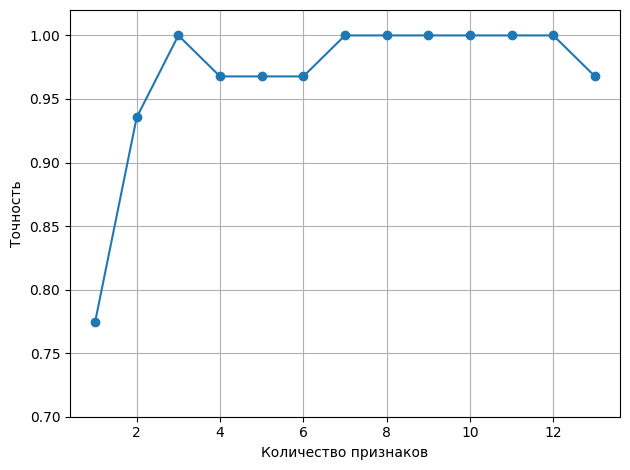

In [145]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Точность')
plt.xlabel('Количество признаков')
plt.grid()
plt.tight_layout()
plt.show()

In [146]:
k3= list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alohol', 'Malic acid', 'OD280/OD315 of dilutes wines'], dtype='object')


In [147]:
knn.fit(X_train_std, y_train)
print('Точность при обучении: ', knn.score(X_train_std, y_train))
print('Точночть при тестировании: ', knn.score(X_test_std, y_test))

Точность при обучении:  0.967741935483871
Точночть при тестировании:  0.9629629629629629


In [148]:
knn.fit(X_train_std[:, k3], y_train)
print('Точность при обучении: ', knn.score(X_train_std[:, k3], y_train))
print('Точночть при тестировании: ', knn.score(X_test_std[:, k3], y_test))

Точность при обучении:  0.9516129032258065
Точночть при тестировании:  0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of dilutes wines   0.136162
 5) Alohol                         0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


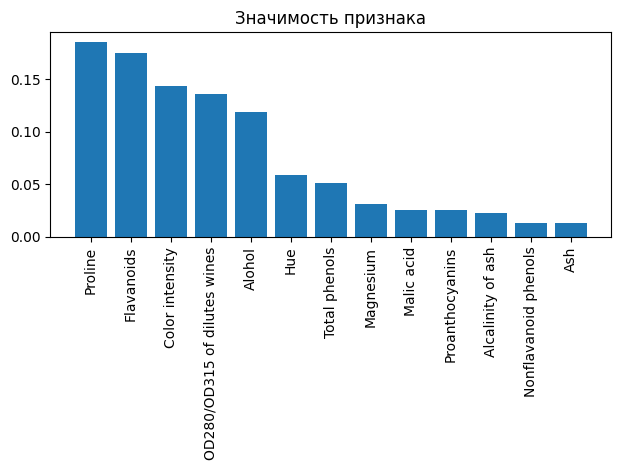

In [149]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title("Значимость признака")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [150]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Количество признаков, соответствующих пороговому ',
      'критерию: ', X_selected.shape[1] )
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]],
                            importances[indices[f]]))

Количество признаков, соответствующих пороговому  критерию:  5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of dilutes wines   0.136162
 5) Alohol                         0.118529


# Сжатие данных путем уменьшения размерности

In [152]:
df_wine =pd.read_csv('wine.data', header=None)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
# стандаотизация признаков
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [154]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


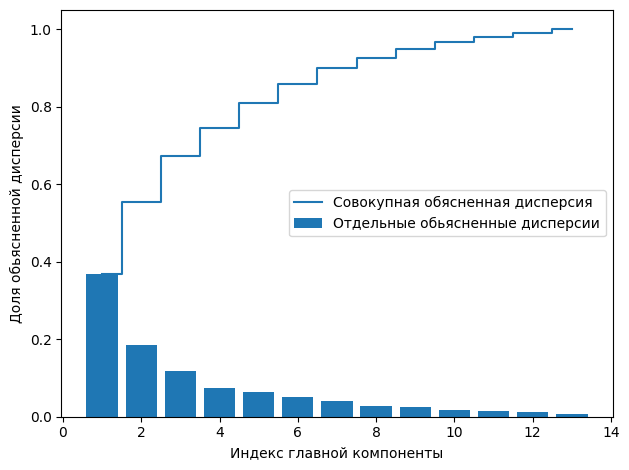

In [156]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in  sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align='center', label='Отдельные обьясненные дисперсии')
plt.step(range(1,14), cum_var_exp, where='mid', label='Совокупная обясненная дисперсия')
plt.ylabel('Доля обьясненной дисперсии')
plt.xlabel('Индекс главной компоненты')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [157]:
# создаем список пар пар (eigenvalue, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# сортируем пары по убыванию
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [158]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Матрица W: \n', w)

Матрица W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [159]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

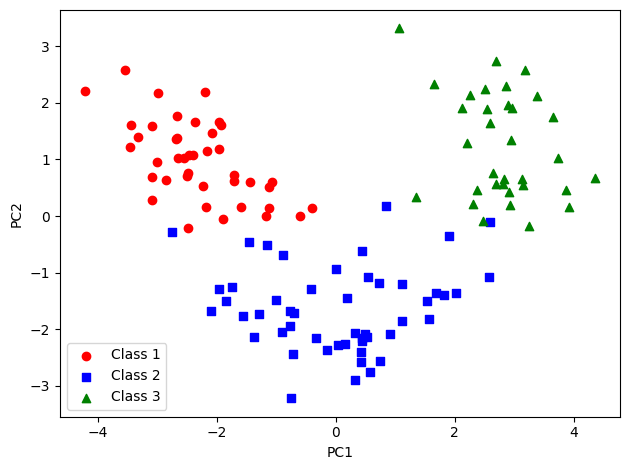

In [161]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

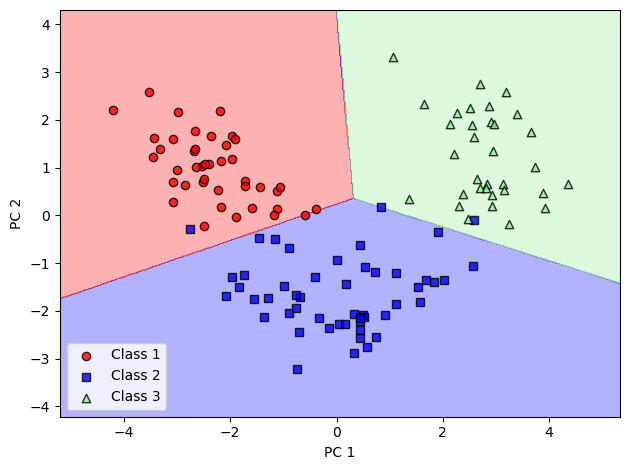

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# инициализация преобразователя PCA
# и оценивателя логистической регрессии
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# понижение размерности
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# обучение модели логистической регрессии на новом наборе
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

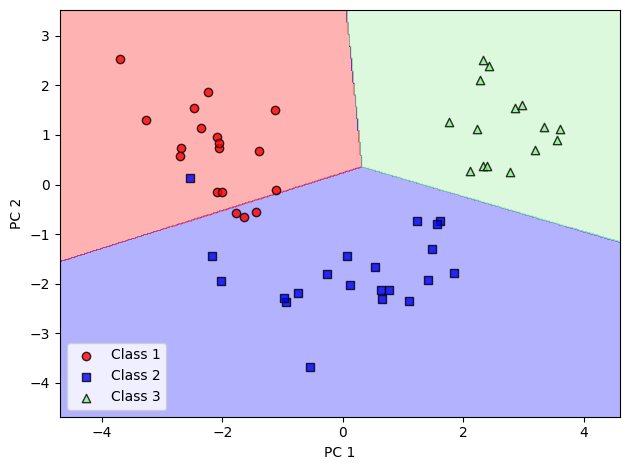

In [164]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [165]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [166]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

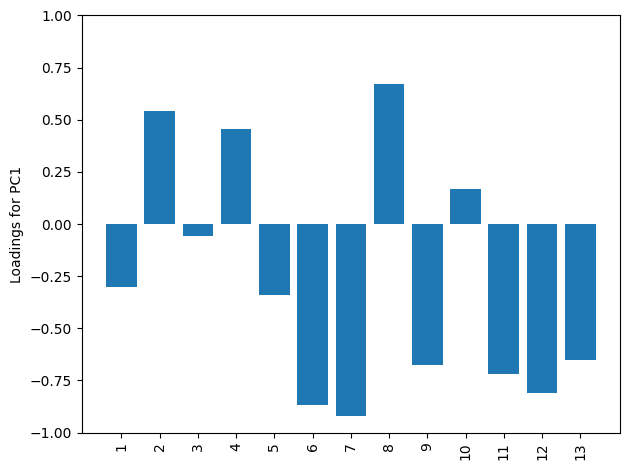

In [168]:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [169]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

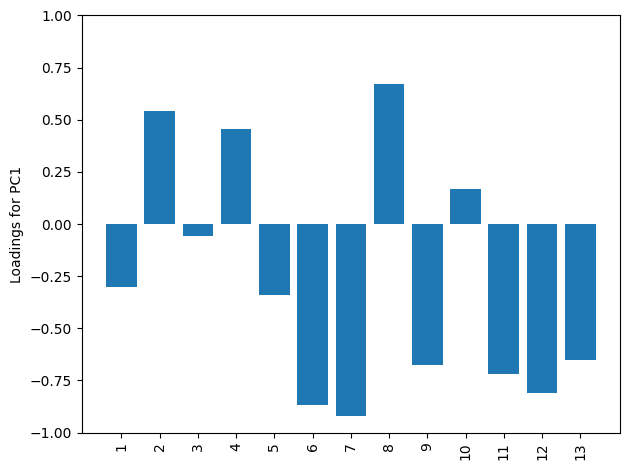

In [170]:
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [171]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f'MV {label} : {mean_vecs[label - 1]}\n')

MV 1 : [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2 : [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3 : [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [173]:
d = 13 # количество признаков
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Матрица внутриклассового разброса: ', f'{S_W.shape[0]} x {S_W.shape[1]}')

Матрица внутриклассового разброса:  13 x 13


In [174]:
print("Распределение меток класса: ", np.bincount(y_train)[1:])

Распределение меток класса:  [41 50 33]


In [175]:
d = 13 # количество признаков
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Матрица внутриклассового разброса: ', f'{S_W.shape[0]} x {S_W.shape[1]}')

Матрица внутриклассового разброса:  13 x 13


In [176]:
mean_olerall = np.mean(X_train_std, axis=0)
mean_olerall = mean_olerall.reshape(d, 1)

In [177]:
d = 13 # количество признаков
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d,  1) 
    S_B += n * (mean_vec - mean_olerall).dot((mean_vec - mean_olerall).T)
print('Матрица внутриклассового разброса: ', f'{S_B.shape[0]} x {S_B.shape[1]}')

Матрица внутриклассового разброса:  13 x 13


In [178]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [179]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Собственные значения по убыванию: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Собственные значения по убыванию: 

349.6178089059939
172.76152218979385
3.9676633644431715e-14
2.842170943040401e-14
2.8042583016303185e-14
1.418161632094629e-14
1.418161632094629e-14
1.3570599394550068e-14
9.439078108684042e-15
9.439078108684042e-15
8.72730981333723e-15
7.64603487341378e-15
1.4564782007104295e-15


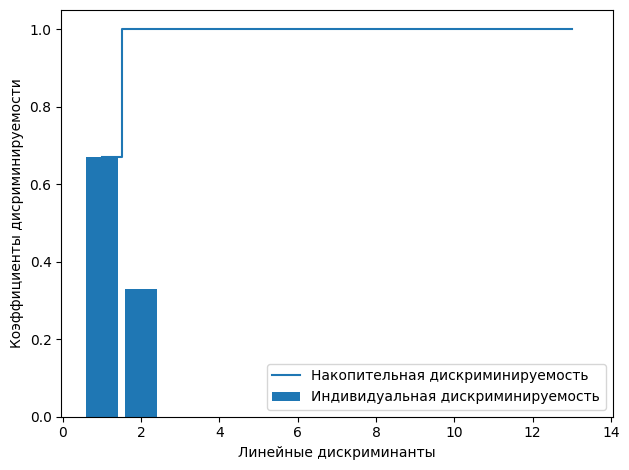

In [180]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in  sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, align='center', label='Индивидуальная дискриминируемость')
plt.step(range(1,14), cum_discr, where='mid', label='Накопительная дискриминируемость')
plt.ylabel('Коэффициенты дисриминируемости')
plt.xlabel('Линейные дискриминанты')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [181]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('Матрица W:\n', w)

Матрица W:
 [[ 0.1481 -0.4092]
 [-0.0908 -0.1577]
 [ 0.0168 -0.3537]
 [-0.1484  0.3223]
 [ 0.0163 -0.0817]
 [-0.1913  0.0842]
 [ 0.7338  0.2823]
 [ 0.075  -0.0102]
 [-0.0018  0.0907]
 [-0.294  -0.2152]
 [ 0.0328  0.2747]
 [ 0.3547 -0.0124]
 [ 0.3915 -0.5958]]


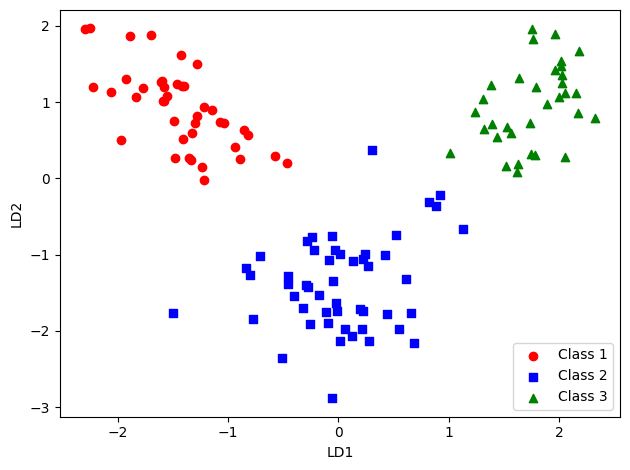

In [187]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m, in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0]*(-1),
                X_train_lda[y_train == l, 1]*(-1),
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

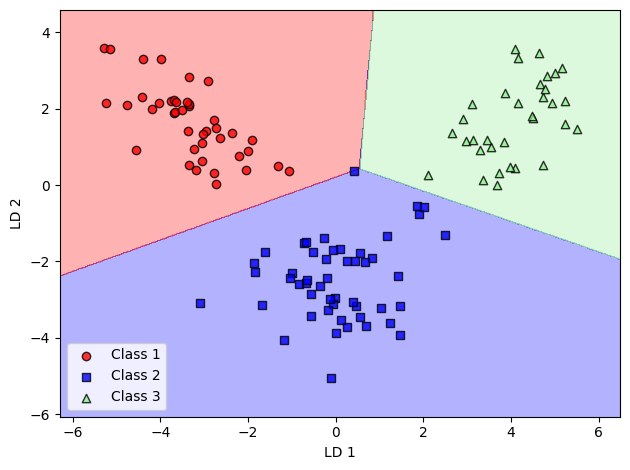

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda =LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

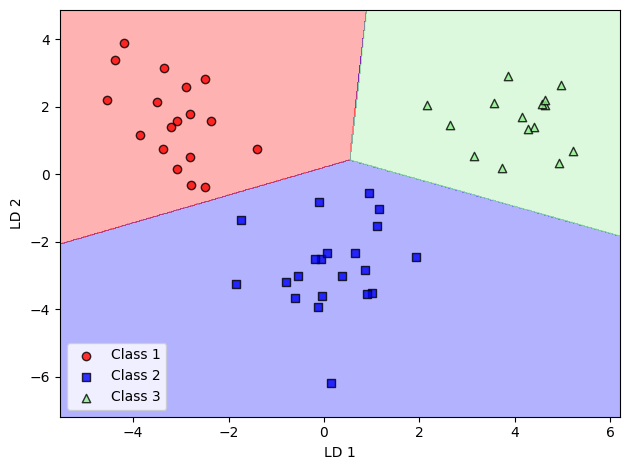

In [190]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [191]:
from sklearn.datasets import load_digits
digits = load_digits()


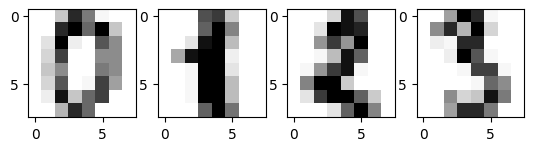

In [192]:
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [193]:
digits.data.shape

(1797, 64)

In [194]:
y_digits = digits.target
X_digits = digits.data

In [195]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

c:\Users\feden\anaconda3\envs\Rashka\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\feden\anaconda3\envs\Rashka\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


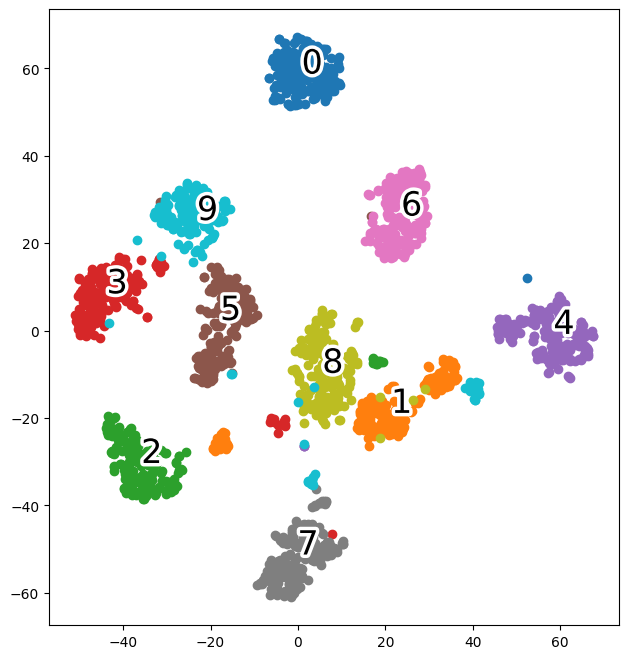

In [200]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'),
                              PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()

# Современные методы оценки моделей и настройки гиперпараметров

In [203]:
df = pd.read_csv('wdbc.data', header=None)
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [204]:
le.transform(['M', 'B'])

array([1, 0])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=1)

In [209]:
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Точность на тестовых данных : {test_acc:.3f}')


Точность на тестовых данных : 0.956


In [210]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score =pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f'Выборка: {k+1:02d}, ',
          f'Распр. кл. : {np.bincount(y_train[train])}',
          f'Точн.: {score:.3f}')

Выборка: 01,  Распр. кл. : [256 153] Точн.: 0.935
Выборка: 02,  Распр. кл. : [256 153] Точн.: 0.935
Выборка: 03,  Распр. кл. : [256 153] Точн.: 0.957
Выборка: 04,  Распр. кл. : [256 153] Точн.: 0.957
Выборка: 05,  Распр. кл. : [256 153] Точн.: 0.935
Выборка: 06,  Распр. кл. : [257 153] Точн.: 0.956
Выборка: 07,  Распр. кл. : [257 153] Точн.: 0.978
Выборка: 08,  Распр. кл. : [257 153] Точн.: 0.933
Выборка: 09,  Распр. кл. : [257 153] Точн.: 0.956
Выборка: 10,  Распр. кл. : [257 153] Точн.: 0.956


In [214]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f' \n Точность по CV: {mean_acc:.3f} +/- {std_acc:.3f}')

 
 Точность по CV: 0.950 +/- 0.014


In [216]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'Оценки точности по CV: {scores}')

Оценки точности по CV: [0.9348 0.9348 0.9565 0.9565 0.9348 0.9556 0.9778 0.9333 0.9556 0.9556]


In [221]:
print(f'Точность поCV: {np.mean(scores):.3f}  +/- {np.std(scores):.3f}')

Точность поCV: 0.950  +/- 0.014


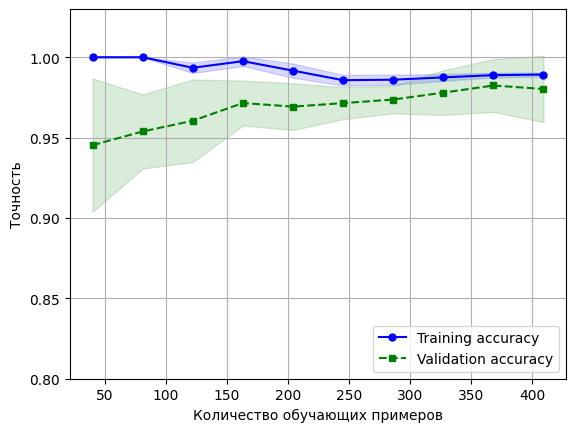

In [222]:
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes,train_mean, color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes,test_mean, color='green', marker='s', linestyle='--',
         markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()


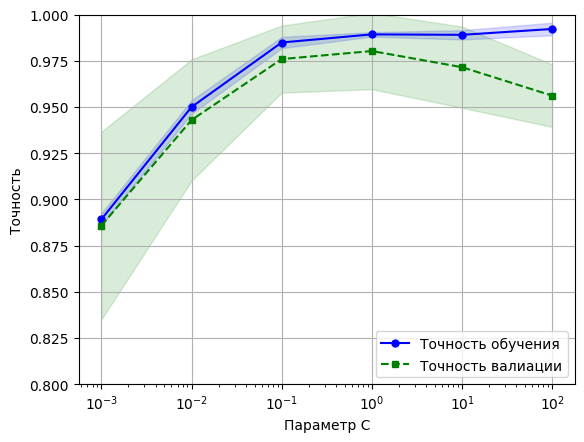

In [224]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name='logisticregression__C',
                                                        param_range=param_range,
                                                        cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range,train_mean, color='blue', marker='o',
         markersize=5, label='Точность обучения')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range,test_mean, color='green', marker='s', linestyle='--',
         markersize=5, label='Точность валиации')
plt.fill_between(param_range, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Параметр С')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid =[{'svc__C' : param_range,
              'svc__kernel' : ['linear']},
             {'svc__C' : param_range,
              'svc__gamma' : param_range,
              'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs =gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [229]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Точность при тестировании: {clf.score(X_test, y_test):.3f}')

Точность при тестировании: 0.974
